In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
mnist.target = mnist.target.astype(np.int8)

/home/pichenot/.local/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.3, random_state=42)
print(X_train[240])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  41. 166.
 253. 103.  13.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0. 

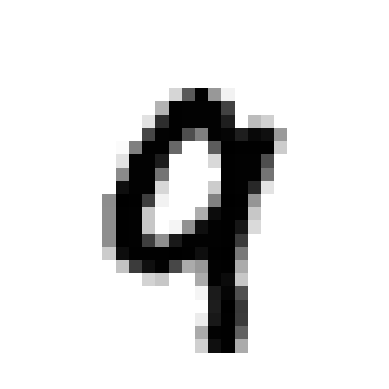

In [17]:
import matplotlib as mpl
import matplotlib.pyplot as plt
some_digit = X_train[240]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary,
interpolation="nearest")
plt.axis("off")
plt.show()

In [36]:
from sklearn.linear_model import SGDClassifier

y_train_2 = (y_train == 2)
y_test_2 = (y_test == 2)

sdg_clf = SGDClassifier().fit(X_train, y_train_2)
print(sdg_clf.score(X_test, y_test_2))

0.9584285714285714


Precision:  0.7457098283931357
Recall:  0.896390060947023


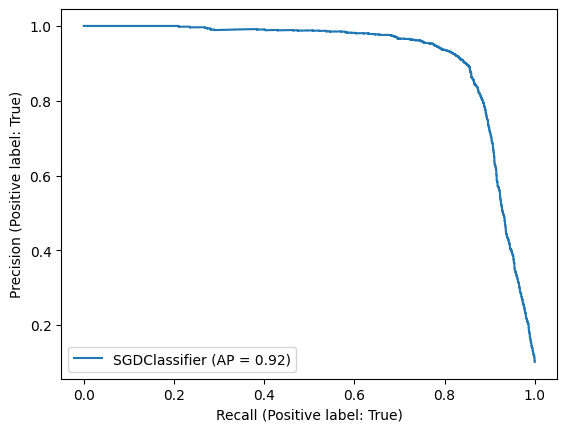

In [37]:
from sklearn.metrics import PrecisionRecallDisplay, precision_score, recall_score

y_test_2 = (y_test == 2)

display = PrecisionRecallDisplay.from_estimator(sdg_clf, X_test, y_test_2)
print("Precision: ", precision_score(y_test_2, sdg_clf.predict(X_test)))
print("Recall: ", recall_score(y_test_2, sdg_clf.predict(X_test)))

In [28]:
from sklearn.ensemble import RandomForestClassifier

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

forest_clf = RandomForestClassifier().fit(X_train, y_train_5)
print(forest_clf.score(X_test, y_test_5))

0.9884285714285714


In [35]:
print("Precision: ", precision_score(y_test_5, forest_clf.predict(X_test)))
print("Recall: ", recall_score(y_test_5, forest_clf.predict(X_test)))

Precision:  0.991764705882353
Recall:  0.8804177545691906


In [38]:
from sklearn.svm import SVC

svm_clf = SVC().fit(X_train, y_train)
print(svm_clf.score(X_test, y_test))

0.9762857142857143


In [40]:
svm_predic = svm_clf.predict(X_test)
print ("Precision: ", precision_score(y_test, svm_predic, average='weighted'))
print ("Recall: ", recall_score(y_test, svm_predic, average='weighted'))

Precision:  0.976279672551265
Recall:  0.9762857142857143
